# Putting the 3 chapters together...

In [1]:
### Importing packages and functions
import sys
import os

In [2]:

import numpy as np
import pylab, json, sympy, scipy
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import rc
from copy import copy
### Importing created functions to load model
from m_generic_neuron_from_json import generic_neuron_from_json
from m_generic_neuron_from_json import load_mod
### Something for sympy to work with python 3
from sympy import S
from operator import itemgetter
import pickle

In [21]:
def saving_pdf_figure(fig,fig_name,md_dir,raster=False,tight=False):
    from matplotlib.backends.backend_pdf import PdfPages
    ax=plt.figure()
    ax=fig
    ax2=fig
    pdffig = PdfPages(fig_name+".pdf")
    if raster:
        if raster>1:
            rast=raster
        else:
            rast=300
        if tight:
            ax.savefig(fig_name+'.png',dpi=rast, bbox_inches = 'tight',
    pad_inches = 0)
            fig.savefig(pdffig, format="pdf",dpi=rast, bbox_inches = 'tight',
    pad_inches = 0)
        else:
            ax.savefig(fig_name+'.png',dpi=rast)
            fig.savefig(pdffig, format="pdf",dpi=rast)
    else:
        if tight:
            ax.savefig(fig_name+'.png', bbox_inches = 'tight',
    pad_inches = 0)
            fig.savefig(pdffig, format="pdf", bbox_inches = 'tight',
    pad_inches = 0)

        else:
            ax.savefig(fig_name+'.png')
            fig.savefig(pdffig, format="pdf")

    metadata = pdffig.infodict()
    metadata['Title'] = md_dir['Title']
    metadata['Author'] = md_dir['Author']
    metadata['Subject'] = md_dir['Subject']
    metadata['Keywords'] = md_dir['Keywords']
    pdffig.close()

### Defining neuron model

In [4]:
## Loading neuron model (file in the cfg folder)
model_name='MTM_W_sPNAs_Temp_snapshot_p0'
### How is the applied current parameter called
strIapp='I_app'
### creating a class neuron from m_generic_neuron_from_json that clasifies the expressions for ode
neuron_snap=generic_neuron_from_json(model_name+'.json',strIapp=strIapp)


# Chapter 3 - Figure 2

### Loading network simulations .. uncomment the Ko and its Iapp to create the figures

In [23]:
from scipy import signal
import brian2
from brian2.units import *
from brian2 import *
from brianutils import load_model
resol=0.01#ms (min resolution of integration)
from brian2 import units
units = vars(units)



# iapi=0.9238477 ## This is the external input needed to make this network spike at 10Hz 
# K_o=13.5

iapi=1.31921738 ## This is the external input needed to make this network spike at 10Hz 
K_o=13.0

# iapi=1.88336673 ## This is the external input needed to make this network spike at 10Hz 
# K_o=12.0

# iapi=2.34713872 ## This is the external input needed to make this network spike at 10Hz 
# K_o=11.0

# iapi=3.44756179 ## This is the external input needed to make this network spike at 10Hz 
# K_o=8.0



dir_SIMS=[]
time_stim=20000
##############################################################333
########### One Run..
model_file='/home/contreras/Documents/Project_Adaptation/network_trial/cfg/MTM_W_sPNAs_Temp_snapshot_wSynInput.json'
bifparx={}

ge_amp=0.035
gi_amp=0.27
############# Loading Fancy name
num_runs=1
ii_num_realizations_4_smooth=1
num_neurons=4000
bifparx["I_app"]=[str(iapi)+"* uA/cm2"]#0.87 for low and -0.68 For high to achieve ~10Hz Fr
bifparx["K_o"]=["("+str(K_o)+"*mM)"]
############# Creating Fancy name to understand simulations later
name='d_Network_N_'+str(num_neurons)+'_num_runs_'+str(1)+'_lengthSim_'+str(int(time_stim))
iapp='I_app'
ko='K_o'
dir_pars=bifparx
Koi_bifparx=float(dir_pars[ko][0][dir_pars[ko][0].index('(')+1:dir_pars[ko][0].index('*')])
if Koi_bifparx-int(Koi_bifparx)==0:
    stringi=ko+'_'+str(int(Koi_bifparx))+'_'
else:
    Koi_bifparx_aux=int((Koi_bifparx-int(Koi_bifparx))*100)
    stringi=ko+'_'+str(int(Koi_bifparx))+'_'+str(Koi_bifparx_aux)+'_'
stringi=stringi+iapp+'_'+str(int(float(dir_pars[iapp][0][0:dir_pars[iapp][0].index('*')])*10))
stringi=stringi+'ge_'+str(int(ge_amp*100))+'_gi_'+str(int(gi_amp*100))
stringi=stringi+'pconnect_'+str(int(10.0))
stringi=stringi+'_wZoomIn2Volt'
stringi=stringi+'_multReal_num'+str(ii_num_realizations_4_smooth)+'wY_pres'
name=name+stringi
dir_sims='/groups/susanne/Susana/Simulations/Network_trial/'
if os.path.isfile(dir_sims+name+'.pkl'):
    print(name + ' Exists, or is being calculated.. :)')
    with open(dir_sims+name+'.pkl', "rb") as f:
        dir_i = pickle.load(f)

    # 2. extract data, most relevant.. specific inputs to each of the cells..
    ii=0
    tzoom=dir_i[ii]['Spiking_zoom']['t']
    vzoom=dir_i[ii]['Spiking_zoom']['V']
    a_y=dir_i[ii]['Spiking_zoom']['y']
    ge=dir_i[ii]['Spiking_zoom']['ge']
    gi=dir_i[ii]['Spiking_zoom']['gi']
    trains_zoom=dir_i[ii]['Spiking_zoom']['Trains']
    aw_pos_pop=dir_i[ii]['Spiking_zoom']['input_distribution_2all']['a']
    bw_pos_pop=dir_i[ii]['Spiking_zoom']['input_distribution_2all']['b']
    v_l0i=dir_i[ii]['Spiking_zoom']['input_distribution_2all']['l0']
    v_ys_0i=dir_i[ii]['Spiking_zoom']['input_distribution_2all']['ys_0']
    v_LC0i=dir_i[ii]['Spiking_zoom']['input_distribution_2all']['v_LC0']
    v_saddlei=dir_i[ii]['Spiking_zoom']['input_distribution_2all']['v_saddle']
    v_stablei=dir_i[ii]['Spiking_zoom']['input_distribution_2all']['v_stable']
    t_I_app_specf_pop_0i=dir_i[ii]['Spiking_zoom']['input_distribution_2all']['I_app_specf_pop_0']
    print(dir_i[ii]['d_Protocol'])
    x_inp=[]
    x_mean_inp=[]
    x_var_inp=[]
    trains_each_i=[]
    for ii_zooms in range(len(vzoom)):
        xi=gi[ii_zooms]*2+ge[ii_zooms]*2+iapi## This comes from the conductance of each synapse (2mS)
        x_inp.append(xi)
        x_mean_inp.append(np.mean(xi))
        x_var_inp.append(np.var(xi))
        trains_each_i.append(trains_zoom[ii_zooms])

    ### First I will take as an example the mean..
    i_unit=np.array(range(len(x_mean_inp)))[np.argmin(np.abs(x_mean_inp-np.median(x_mean_inp)))]
    pass
else:
    ############# Running the network
    # try:
    dir_sim_i={}
#     save_obj(dir_sim_i, dir_sims+name)
    print('this file doesnt exist.. :(  '+name)


d_Network_N_4000_num_runs_1_lengthSim_20000K_o_13_I_app_13ge_3_gi_27pconnect_10_wZoomIn2Volt_multReal_num1wY_pres Exists, or is being calculated.. :)
{'bifparx': {'I_app': ['1.31921738* uA/cm2'], 'K_o': ['(13.0*mM)']}, 'num_neurons': 4000, 'model_file': '/home/contreras/Documents/Project_Adaptation/network_trial/cfg/MTM_W_sPNAs_Temp_snapshot_wSynInput.json'}


In [24]:
#### We want to sort the spike trains, to show them sorted in the raster plot
fr_ini=[]
t_ini=500+dir_i[0]['Population_Rate']['t'][0]
m_trains=dir_i[0]['Spiking']['Trains']
for ii in range(len(m_trains)):
    fr_ini.append(sum(m_trains[ii]<t_ini))
    
ii_sort_Fr=np.argsort(fr_ini)

In [25]:
#### This is the format for the figures in the thesis
import json
P= json.load(open("cfg/Thesis_mpl.json")) # import plot parameter
matplotlib.rcParams.update([(j,k) for (j,k) in P.items()
                            if j in matplotlib.rcParams.keys()])

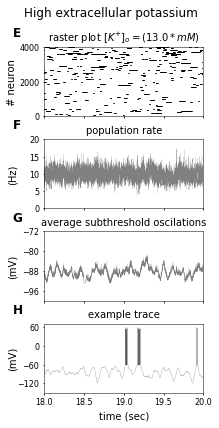

<Figure size 410.4x360 with 0 Axes>

In [26]:
from scipy import signal
fig_wide=matplotlib.rcParams["figure.figsize"][0]
fig_height=matplotlib.rcParams["figure.figsize"][1]

f1, ax= plt.subplots(4, sharex=True, facecolor="1",figsize=(fig_wide*0.5,fig_height*1.3))

fr_ini=[]
t_ini=300+dir_i[0]['Population_Rate']['t'][0]
m_trains=dir_i[0]['Spiking']['Trains']
for ii in range(len(m_trains)):
    fr_ini.append(sum(m_trains[ii]<t_ini))
    
ii_sort_Fr=np.argsort(fr_ini)

bifparx=dir_i[0]['d_Protocol']['bifparx'] 
ax[0].eventplot(np.array(m_trains)[ii_sort_Fr]/1000.0,linelengths=1.0,color='k')
ax[0].set_title(r'raster plot $[K^{+}]_o = '+bifparx["K_o"][0]+'$')
ax[0].set_ylabel(r'# neuron')
locatory0 = MaxNLocator(nbins=2) # with 3 bins you will have 4 ticks
ax[0].yaxis.set_major_locator(locatory0)
ax[0].set_ylim([0,num_neurons])


ax[1].plot(dir_i[0]['Population_Rate']['t']/1000.0, dir_i[0]['Population_Rate']['Freq_Pop'],linewidth=matplotlib.rcParams['axes.linewidth']*0.3,color='grey',rasterized=True)
ax[1].set_title("population rate")
ax[1].set_ylabel(r'(Hz)')
locatory1 = MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
ax[1].yaxis.set_major_locator(locatory1)
ax[1].set_ylim([0,20])

### subthreshold oscillations: 
ax[2].plot(dir_i[0]['Spiking_zoom']['t']/1000.0, np.mean(dir_i[0]['Spiking_zoom']['V'],axis=0),linewidth=matplotlib.rcParams['axes.linewidth']*0.3, color='grey',rasterized=True)
# ax[2].plot(statemon.t/ms, aM_e,color='r')
# ax[2].plot(statemon.t/ms, aM_i,color='k')
ax[2].set_title(r'average subthreshold oscilations')
ax[2].set_ylabel(r'(mV)')
ax[2].set_ylim([-100,-72])
locatory2 = MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
ax[2].yaxis.set_major_locator(locatory2)

#jj=int(len(dir_i[0]['Spiking_zoom']['V'])/3)
jj=np.argmin(abs(np.mean([len(ii_trains) for ii_trains in dir_i[0]['Spiking_zoom']['Trains']])-[len(ii_trains) for ii_trains in dir_i[0]['Spiking_zoom']['Trains']]))
ax[3].plot(dir_i[0]['Spiking_zoom']['t']/1000.0, dir_i[0]['Spiking_zoom']['V'][jj], color='k',linewidth=matplotlib.rcParams['axes.linewidth']*0.3 ,label='Neuron '+str(jj),rasterized=True)
ax[3].set_title("example trace")
ax[3].set_ylabel(r'(mV)')
ax[3].set_xlabel(r'time (sec)')
locatory3 = MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
ax[3].yaxis.set_major_locator(locatory3)
ax[3].set_ylim([-150,70])

import string
for n, axs in enumerate(ax.flat):
    if K_o==8.0:
        inlabel=0
    if K_o==13.0:
        inlabel=4
    axs.text(-0.2, 1.15, string.ascii_uppercase[n+inlabel], transform=axs.transAxes, 
            size=matplotlib.rcParams["font.size"], weight='bold')

############################################
### sup title
############################################
# f1.suptitle('Ko='+str(K_o))
if K_o==8.0:
    f1.suptitle('Low extracellular potassium')
    
if K_o==13.0:
    f1.suptitle('High extracellular potassium')
    
######## Saving Fig..
dir_figs='/home/contreras/Documents/Project_Adaptation/network_trial/Figs/'
name_file='NetworkRasterPlot_'+str(num_neurons)+'_num_runs_'+str(1)+'_lengthSim_'+str(int(time_stim))+'_'
iapp='I_app'
ko='K_o'
stringi=ko+'_'+str(int(float(bifparx[ko][0][bifparx[ko][0].index('(')+1:bifparx[ko][0].index('*')])))+'_'
stringi=stringi+iapp+'_'+str(int(float(bifparx[iapp][0][0:bifparx[iapp][0].index('*')])*10))
stringi=stringi+'ge_'+str(int(ge_amp*100))+'_gi_'+str(int(gi_amp*100))
name=name_file+stringi
fig_file_title='fig_'+name+'v_thesis'
md_dir={
        'Title':'Raster plot',
        'Author':"Susana Contreras 25/02/2019",
        'Subject':'Network simulation '+str(num_neurons)+' neurons snapshot with Ko='+str(int(float(bifparx[ko][0][bifparx[ko][0].index('(')+1:bifparx[ko][0].index('*')]))),
        'Keywords':"Ko bistability, network synchronization, SNIC, SNL"
        }
ax[0].set_xlim(18000/1000.0,20000/1000.0)

############################################
### Moving the boxes a bit to make it fit
############################################
d_boxy=0.03
d_boxx=0.05

box0=ax[0].get_position()
box1=ax[1].get_position()
box2=ax[2].get_position()
box3=ax[3].get_position()

ax[0].set_position([box0.x0+d_boxx, box0.y0+d_boxy, box0.width, box0.height*0.9])
ax[1].set_position([box1.x0+d_boxx, box1.y0+d_boxy, box1.width, box1.height*0.9])
ax[2].set_position([box2.x0+d_boxx, box2.y0+d_boxy, box2.width, box2.height*0.9])
ax[3].set_position([box3.x0+d_boxx, box3.y0+d_boxy, box3.width, box3.height*0.9])

############################################
### Aligning y labels
############################################
labely = -0.17  # axes coords
ax[0].yaxis.set_label_coords(labely, 0.5)
ax[1].yaxis.set_label_coords(labely, 0.5)
ax[2].yaxis.set_label_coords(labely, 0.5)
ax[3].yaxis.set_label_coords(labely, 0.5)

                    
saving_pdf_figure(f1,'./Figs/'+fig_file_title,md_dir,raster=300,tight=True)
    
f1.show()